In [1]:
import warnings
warnings.filterwarnings('ignore')
# data wrangling & pre-processing
import pandas as pd
import numpy as np
# data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
#model validation
from sklearn.metrics import log_loss,roc_auc_score,precision_score,f1_score,recall_score,roc_curve,auc
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,fbeta_score,matthews_corrcoef
from sklearn import metrics
# cross validation
from sklearn.model_selection import StratifiedKFold
# machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier,ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC 
import xgboost as xgb
from scipy import stats
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.naive_bayes import GaussianNB

### Loading Dataset

In [2]:
dataset=pd.read_csv("C:/Users/Harshini/Downloads/Heart_Disease_Prediction (2).csv")
df=pd.DataFrame(dataset)
df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


### Data Cleaning & Preprocessing

In [3]:
df['Chest pain type'][df['Chest pain type'] == 1] = 'typical angina'
df['Chest pain type'][df['Chest pain type'] == 2] = 'atypical angina'
df['Chest pain type'][df['Chest pain type'] == 3] = 'non-anginal pain'
df['Chest pain type'][df['Chest pain type'] == 4] = 'asymptomatic'

In [4]:
df['EKG results'][df['EKG results'] == 0] = 'normal'
df['EKG results'][df['EKG results'] == 1] = 'ST-T wave abnormality'
df['EKG results'][df['EKG results'] == 2] = 'left ventricular hypertrophy'

In [5]:
df['Slope of ST'][df['Slope of ST'] == 1] = 'upsloping'
df['Slope of ST'][df['Slope of ST'] == 2] = 'flat'
df['Slope of ST'][df['Slope of ST'] == 3] = 'downsloping'

In [6]:
df["Sex"] = df.Sex.apply(lambda  x:'male' if x==1 else 'female')

In [7]:
df['Chest pain type'].value_counts()

asymptomatic        129
non-anginal pain     79
atypical angina      42
typical angina       20
Name: Chest pain type, dtype: int64

In [8]:
df['EKG results'].value_counts()

left ventricular hypertrophy    137
normal                          131
ST-T wave abnormality             2
Name: EKG results, dtype: int64

In [9]:
df['Slope of ST'].value_counts()

upsloping      130
flat           122
downsloping     18
Name: Slope of ST, dtype: int64

In [10]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,male,asymptomatic,130,322,0,left ventricular hypertrophy,109,0,2.4,flat,3,3,Presence
1,67,female,non-anginal pain,115,564,0,left ventricular hypertrophy,160,0,1.6,flat,0,7,Absence
2,57,male,atypical angina,124,261,0,normal,141,0,0.3,upsloping,0,7,Presence
3,64,male,asymptomatic,128,263,0,normal,105,1,0.2,flat,1,7,Absence
4,74,female,atypical angina,120,269,0,left ventricular hypertrophy,121,1,0.2,upsloping,1,3,Absence


In [11]:
df.tail()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
265,52,male,non-anginal pain,172,199,1,normal,162,0,0.5,upsloping,0,7,Absence
266,44,male,atypical angina,120,263,0,normal,173,0,0.0,upsloping,0,7,Absence
267,56,female,atypical angina,140,294,0,left ventricular hypertrophy,153,0,1.3,flat,0,3,Absence
268,57,male,asymptomatic,140,192,0,normal,148,0,0.4,flat,0,6,Absence
269,67,male,asymptomatic,160,286,0,left ventricular hypertrophy,108,1,1.5,flat,3,3,Presence


In [12]:
df.isna().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [13]:
df.shape

(270, 14)

In [14]:
df.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

In [15]:
df.describe(include =[np.number])

,Age,BP,Cholesterol,FBS over 120,Max HR,Exercise angina,ST depression,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000
mean,54.433333,131.344444,249.659259,0.148148,149.677778,0.329630,1.05000,0.670370,4.696296
std,9.109067,17.861608,51.686237,0.355906,23.165717,0.470952,1.14521,0.943896,1.940659
min,29.000000,94.000000,126.000000,0.000000,71.000000,0.000000,0.00000,0.000000,3.000000
25%,48.000000,120.000000,213.000000,0.000000,133.000000,0.000000,0.00000,0.000000,3.000000
50%,55.000000,130.000000,245.000000,0.000000,153.500000,0.000000,0.80000,0.000000,3.000000
75%,61.000000,140.000000,280.000000,0.000000,166.000000,1.000000,1.60000,1.000000,7.000000
max,77.000000,200.000000,564.000000,1.000000,202.000000,1.000000,6.20000,3.000000,7.000000


In [16]:
df.describe(include =[np.object])

,Sex,Chest pain type,EKG results,Slope of ST,Heart Disease
count,270,270,270,270,270
unique,2,4,3,3,2
top,male,asymptomatic,left ventricular hypertrophy,upsloping,Absence
freq,183,129,137,130,150


### Distribution of Heart Disease

[Text(0.5, 1.0, 'No. of Heart disease patients in Dataset')]

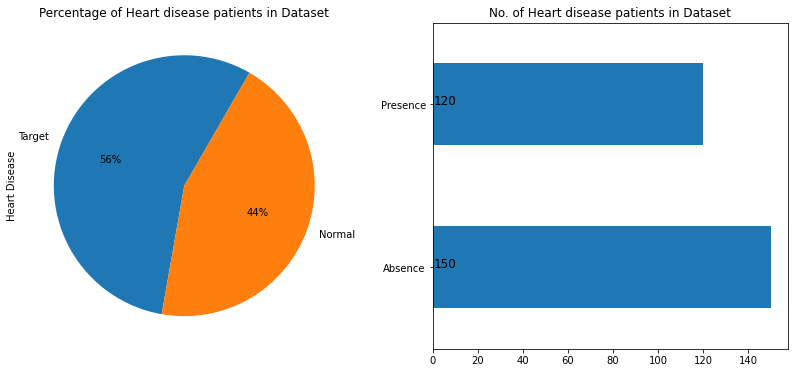

In [17]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(14,6))

ax1 = df['Heart Disease'].value_counts().plot.pie( x="Target" ,y ='no.of patients', 
                   autopct = "%1.0f%%",labels=["Target","Normal"], startangle = 60,ax=ax1);
ax1.set(title = 'Percentage of Heart disease patients in Dataset')

ax2 = df["Heart Disease"].value_counts().plot(kind="barh" ,ax =ax2)
for i,j in enumerate(df['Heart Disease'].value_counts().values):
    ax2.text(.5,i,j,fontsize=12)
ax2.set(title = 'No. of Heart disease patients in Dataset')

### Gender and Age wise Distribution

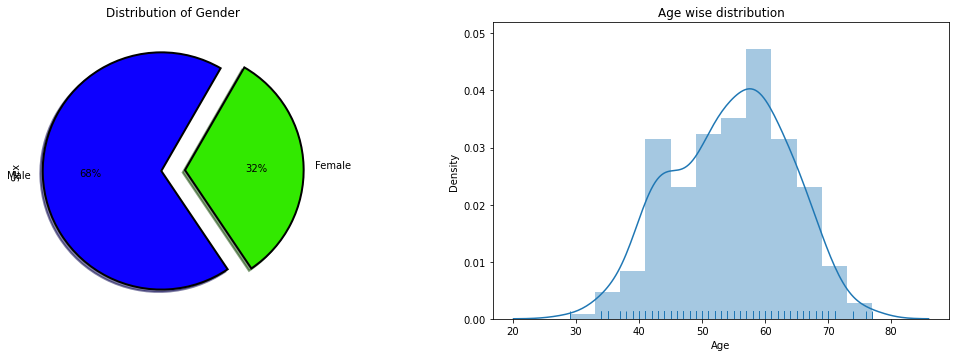

In [18]:
plt.figure(figsize=(18,12))
plt.subplot(221)
df["Sex"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism",5),startangle = 60,labels=["Male","Female"],
wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.1,.1],shadow =True)
plt.title("Distribution of Gender")
plt.subplot(222)
ax= sns.distplot(df['Age'], rug=True)
plt.title("Age wise distribution")
plt.show()


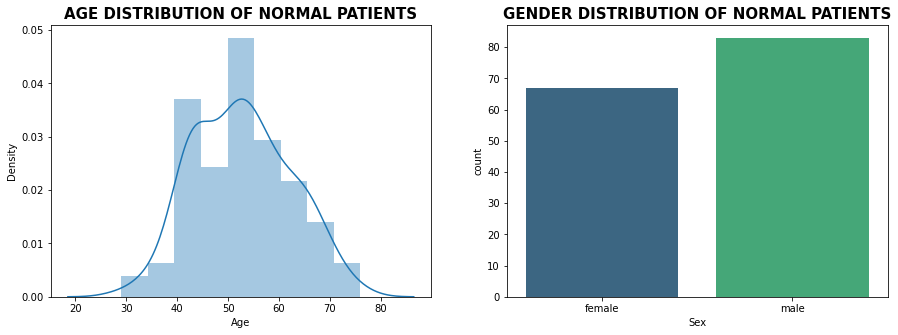

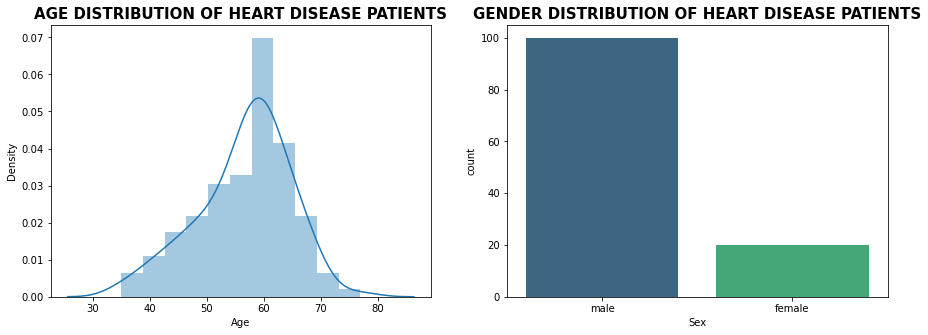

In [19]:
attr_1=df[df['Heart Disease']=='Presence']

attr_0=df[df['Heart Disease']=='Absence']

# plotting normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(attr_0['Age'])
plt.title('AGE DISTRIBUTION OF NORMAL PATIENTS', fontsize=15, weight='bold')

ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_0['Sex'], palette='viridis')
plt.title('GENDER DISTRIBUTION OF NORMAL PATIENTS', fontsize=15, weight='bold' )
plt.show()

#plotting heart patients

fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(attr_1['Age'])
plt.title('AGE DISTRIBUTION OF HEART DISEASE PATIENTS', fontsize=15, weight='bold')

ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1['Sex'], palette='viridis')
plt.title('GENDER DISTRIBUTION OF HEART DISEASE PATIENTS', fontsize=15, weight='bold' )
plt.show()

### Distribution of Chest pain type

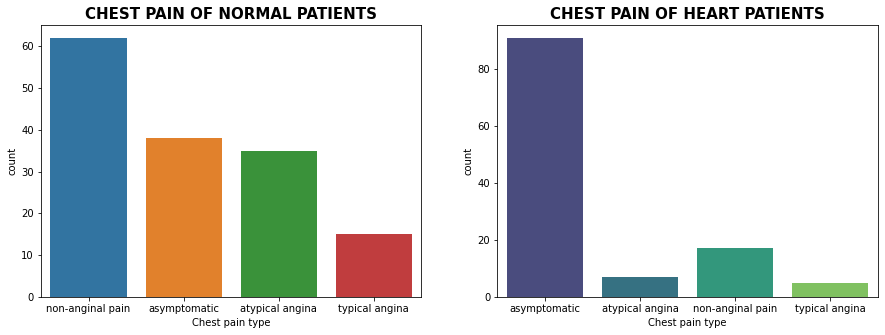

In [20]:
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(attr_0['Chest pain type'])
plt.title('CHEST PAIN OF NORMAL PATIENTS', fontsize=15, weight='bold')

#plotting heart patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1['Chest pain type'], palette='viridis')
plt.title('CHEST PAIN OF HEART PATIENTS', fontsize=15, weight='bold' )
plt.show()

In [21]:
plot_criteria= ['Chest pain type', 'Heart Disease']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

Heart Disease,Absence,Presence
Chest pain type,,
asymptomatic,25.330000,75.830000
atypical angina,23.330000,5.830000
non-anginal pain,41.330000,14.170000
typical angina,10.000000,4.170000


### Distribution of Rest ECG

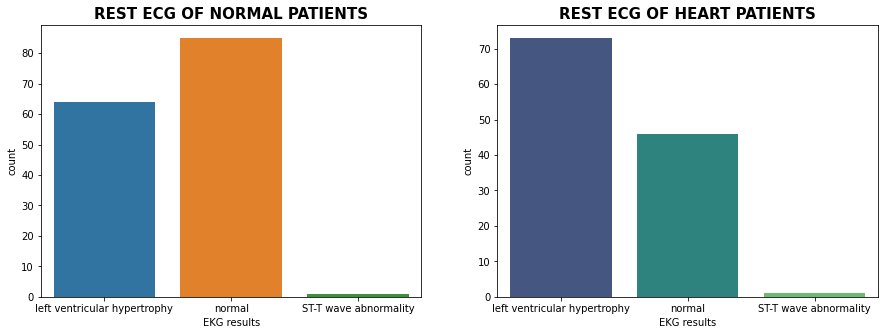

In [22]:
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(attr_0['EKG results'])
plt.title('REST ECG OF NORMAL PATIENTS', fontsize=15, weight='bold')

#plotting heart patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1['EKG results'], palette='viridis')
plt.title('REST ECG OF HEART PATIENTS', fontsize=15, weight='bold' )
plt.show()

In [23]:
plot_criteria= ['EKG results', 'Heart Disease']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)


Heart Disease,Absence,Presence
EKG results,,
ST-T wave abnormality,0.670000,0.830000
left ventricular hypertrophy,42.670000,60.830000
normal,56.670000,38.330000


Text(0.5, 1.0, 'ST SLOPE OF HEART PATIENTS')

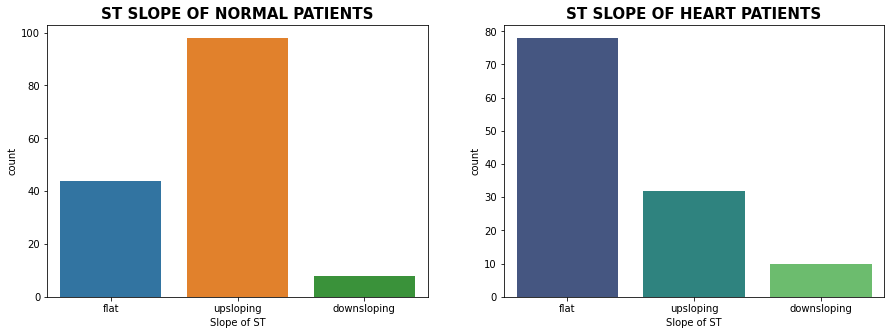

In [58]:
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(attr_0['Slope of ST'])
plt.title('ST SLOPE OF NORMAL PATIENTS', fontsize=15, weight='bold')

#plotting heart patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1['Slope of ST'], palette='viridis')
plt.title('ST SLOPE OF HEART PATIENTS', fontsize=15, weight='bold' )

In [60]:
plot_criteria= ['Slope of ST', 'Heart Disease']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)


Heart Disease,Absence,Presence
Slope of ST,,
downsloping,5.330000,8.330000
flat,29.330000,65.000000
upsloping,65.330000,26.670000


### Distribution of numerical feature

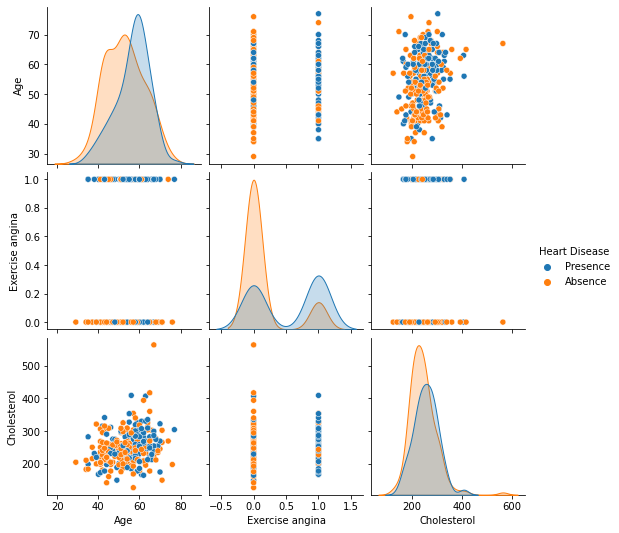

In [24]:
sns.pairplot(df, hue = 'Heart Disease', vars = ['Age', 'Exercise angina', 'Cholesterol'] )


<AxesSubplot:xlabel='Exercise angina', ylabel='Cholesterol'>

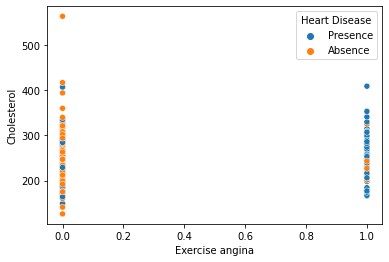

In [63]:
sns.scatterplot(x = 'Exercise angina', y = 'Cholesterol', hue = 'Heart Disease', data = df)

<AxesSubplot:xlabel='Exercise angina', ylabel='Age'>

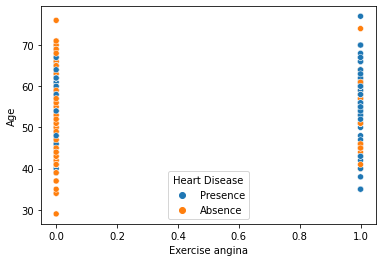

In [66]:
sns.scatterplot(x = 'Exercise angina', y = 'Age', hue = 'Heart Disease', data = df)

### Outlier Detection and Removal

In [25]:
df_numeric = df[['Age','Exercise angina','Cholesterol','Max HR']]

In [26]:
df_numeric.head()

,Age,Exercise angina,Cholesterol,Max HR
0,70,0,322,109
1,67,0,564,160
2,57,0,261,141
3,64,1,263,105
4,74,1,269,121


In [27]:
z = np.abs(stats.zscore(df_numeric))
print(z)

          Age  Exercise angina  Cholesterol    Max HR
0    1.712094         0.701222     1.402212  1.759208
1    1.382140         0.701222     6.093004  0.446409
2    0.282294         0.701222     0.219823  0.375291
3    1.052186         1.426081     0.258589  1.932198
4    2.152032         1.426081     0.374890  1.240239
..        ...              ...          ...       ...
265  0.267629         0.701222     0.981951  0.532904
266  1.147506         0.701222     0.258589  1.008625
267  0.172309         0.701222     0.859476  0.143677
268  0.282294         0.701222     1.117635  0.072560
269  1.382140         1.426081     0.704409  1.802456

[270 rows x 4 columns]


In [28]:
threshold = 3
print(np.where(z > 3))

(array([  1,   9,  52, 101, 181], dtype=int64), array([2, 2, 2, 3, 2], dtype=int64))


In [29]:
df = df[(z < 3).all(axis=1)]

In [30]:
df.shape

(265, 14)

In [31]:
df = pd.get_dummies(df, drop_first=True)

df.head()

,Age,BP,Cholesterol,FBS over 120,Max HR,Exercise angina,ST depression,Number of vessels fluro,Thallium,Sex_male,Chest pain type_atypical angina,Chest pain type_non-anginal pain,Chest pain type_typical angina,EKG results_left ventricular hypertrophy,EKG results_normal,Slope of ST_flat,Slope of ST_upsloping,Heart Disease_Presence
0,70,130,322,0,109,0,2.4,3,3,1,0,0,0,1,0,1,0,1
2,57,124,261,0,141,0,0.3,0,7,1,1,0,0,0,1,0,1,1
3,64,128,263,0,105,1,0.2,1,7,1,0,0,0,0,1,1,0,0
4,74,120,269,0,121,1,0.2,1,3,0,1,0,0,1,0,0,1,0
5,65,120,177,0,140,0,0.4,0,7,1,0,0,0,0,1,0,1,0


In [32]:
df.shape

(265, 18)

In [33]:
X = df.drop(['Heart Disease_Presence'],axis=1)
y = df['Heart Disease_Presence']

### Checking Correlation

<AxesSubplot:title={'center':'Correlation with Diabetes'}>

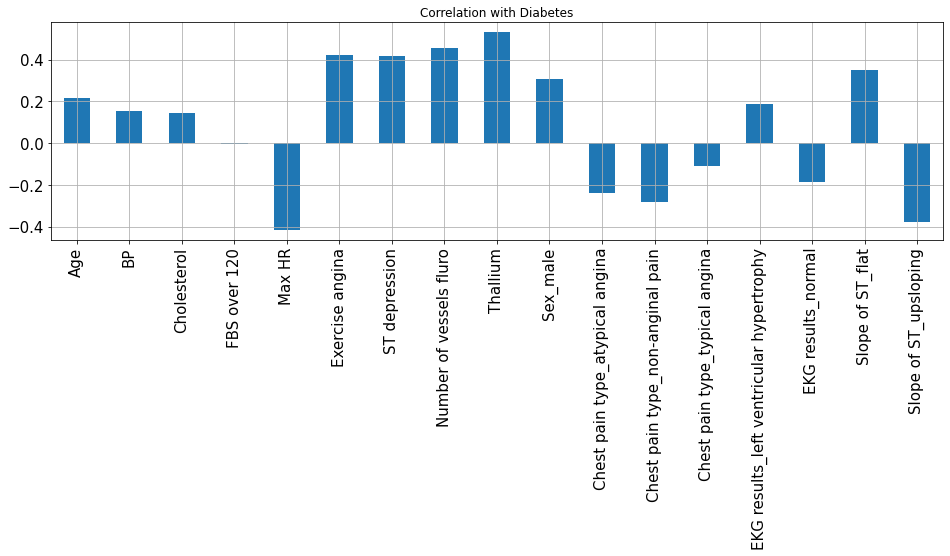

In [34]:
X.corrwith(y).plot.bar(
        figsize = (16, 4), title = "Correlation with Diabetes", fontsize = 15,
        rot = 90, grid = True)

### Train Test split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2,shuffle=True, random_state=5)

In [36]:
print('Distribution of target variable in training set')
print(y_train.value_counts())

print('Distribution of target variable in test set')
print(y_test.value_counts())

Distribution of traget variable in training set
0    118
1     94
Name: Heart Disease_Presence, dtype: int64
Distribution of traget variable in test set
0    30
1    23
Name: Heart Disease_Presence, dtype: int64


In [37]:
print('------------Training Set------------------')
print(X_train.shape)
print(y_train.shape)

print('------------Test Set------------------')
print(X_test.shape)
print(y_test.shape)

------------Training Set------------------
(212, 17)
(212,)
------------Test Set------------------
(53, 17)
(53,)


In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train[['Age','EKG results_normal','Cholesterol','Max HR','Slope of ST_flat']] = scaler.fit_transform(X_train[['Age','EKG results_normal','Cholesterol','Max HR','Slope of ST_flat']])
X_train.head()

,Age,BP,Cholesterol,FBS over 120,Max HR,Exercise angina,ST depression,Number of vessels fluro,Thallium,Sex_male,Chest pain type_atypical angina,Chest pain type_non-anginal pain,Chest pain type_typical angina,EKG results_left ventricular hypertrophy,EKG results_normal,Slope of ST_flat,Slope of ST_upsloping
182,0.250000,110,0.171642,0,0.584906,0,0.0,0,7,1,0,0,0,1,0.0,0.0,1
140,0.729167,145,0.320896,0,0.339623,0,2.0,2,6,1,0,0,0,1,0.0,1.0,0
193,0.125000,126,0.582090,0,0.566038,1,0.0,0,7,1,0,0,0,1,0.0,0.0,1
200,0.812500,118,0.563433,0,0.518868,0,1.0,1,7,1,0,1,0,0,1.0,0.0,1
206,0.645833,102,0.716418,0,0.603774,0,0.0,1,3,0,0,1,0,0,1.0,0.0,1


In [39]:
X_test[['Age','EKG results_normal','Cholesterol','Max HR','Slope of ST_flat']] = scaler.transform(X_test[['Age','EKG results_normal','Cholesterol','Max HR','Slope of ST_flat']])
X_test.head()

,Age,BP,Cholesterol,FBS over 120,Max HR,Exercise angina,ST depression,Number of vessels fluro,Thallium,Sex_male,Chest pain type_atypical angina,Chest pain type_non-anginal pain,Chest pain type_typical angina,EKG results_left ventricular hypertrophy,EKG results_normal,Slope of ST_flat,Slope of ST_upsloping
58,0.625000,174,0.458955,0,0.443396,1,0.0,0,3,0,0,0,0,0,1.0,1.0,0
219,0.312500,120,0.350746,0,0.698113,0,0.0,0,3,1,1,0,0,0,1.0,0.0,1
53,0.708333,140,0.257463,0,0.783019,0,0.0,2,3,0,1,0,0,0,1.0,0.0,1
2,0.583333,124,0.503731,0,0.424528,0,0.3,0,7,1,1,0,0,0,1.0,0.0,1
47,0.312500,110,0.264925,0,0.764151,0,0.0,1,3,1,0,0,0,1,0.0,0.0,1


In [40]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
import xgboost as xgb
# function initializing baseline machine learning models
def GetBasedModel():
    basedModels = []
    basedModels.append(('LR_L2'   , LogisticRegression(penalty='l2')))
    basedModels.append(('LDA'  , LinearDiscriminantAnalysis()))
    basedModels.append(('KNN7'  , KNeighborsClassifier(7)))
    basedModels.append(('KNN5'  , KNeighborsClassifier(5)))
    basedModels.append(('KNN9'  , KNeighborsClassifier(9)))
    basedModels.append(('KNN11'  , KNeighborsClassifier(11)))
    basedModels.append(('CART' , DecisionTreeClassifier()))
    basedModels.append(('NB'   , GaussianNB()))
    basedModels.append(('SVM Linear'  , SVC(kernel='linear',gamma='auto',probability=True)))
    basedModels.append(('SVM RBF'  , SVC(kernel='rbf',gamma='auto',probability=True)))
    basedModels.append(('AB'   , AdaBoostClassifier()))
    basedModels.append(('GBM'  , GradientBoostingClassifier(n_estimators=100,max_features='sqrt')))
    basedModels.append(('RF_Ent100'   , RandomForestClassifier(criterion='entropy',n_estimators=100)))
    basedModels.append(('RF_Gini100'   , RandomForestClassifier(criterion='gini',n_estimators=100)))
    basedModels.append(('ET100'   , ExtraTreesClassifier(n_estimators= 100)))
    basedModels.append(('ET500'   , ExtraTreesClassifier(n_estimators= 500)))
    basedModels.append(('MLP', MLPClassifier()))
    basedModels.append(('SGD3000', SGDClassifier(max_iter=1000, tol=1e-4)))
    basedModels.append(('XGB_2000', xgb.XGBClassifier(n_estimators= 2000)))
    basedModels.append(('XGB_500', xgb.XGBClassifier(n_estimators= 500)))
    basedModels.append(('XGB_100', xgb.XGBClassifier(n_estimators= 100)))
    basedModels.append(('XGB_1000', xgb.XGBClassifier(n_estimators= 1000)))
    basedModels.append(('ET1000'   , ExtraTreesClassifier(n_estimators= 1000)))
    
    return basedModels

# function for performing 10-fold cross validation of all the baseline models
def BasedLine2(X_train, y_train,models):
    # Test options and evaluation metric
    num_folds = 10
    scoring = 'accuracy'
    seed = 7
    results = []
    names = []
    for name, model in models:
        kfold = model_selection.KFold(n_splits=10, random_state=None)
        cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
    return results,msg
    

In [41]:
models = GetBasedModel()
names,results = BasedLine2(X_train, y_train,models)

LR_L2: 0.858874 (0.045985)
LDA: 0.854113 (0.052426)
KNN7: 0.777922 (0.087742)
KNN5: 0.749567 (0.097254)
KNN9: 0.777922 (0.085119)
KNN11: 0.749567 (0.099558)
CART: 0.731169 (0.063378)
NB: 0.839610 (0.057009)
SVM Linear: 0.840043 (0.051116)
SVM RBF: 0.763853 (0.102216)
AB: 0.783333 (0.061148)
GBM: 0.802165 (0.074146)
RF_Ent100: 0.830087 (0.056553)
RF_Gini100: 0.820779 (0.049480)
ET100: 0.820130 (0.067026)
ET500: 0.810606 (0.067851)
MLP: 0.741991 (0.191860)
SGD3000: 0.674675 (0.118784)
XGB_2000: 0.792641 (0.050455)
XGB_500: 0.797403 (0.049569)
XGB_100: 0.816017 (0.044422)
XGB_1000: 0.792641 (0.054765)
ET1000: 0.820130 (0.063553)


### Model Building

### Random forest classifier

In [42]:
rf_ent = RandomForestClassifier(criterion='entropy',n_estimators=100)
rf_ent.fit(X_train, y_train)
y_pred_rfe = rf_ent.predict(X_test)

### Multi Layer Perceptron

In [43]:
mlp = MLPClassifier()
mlp.fit(X_train,y_train)
y_pred_mlp = mlp.predict(X_test)

### K-Nearest Neighbour

In [44]:
knn = KNeighborsClassifier(9)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)

### Extre Tree Classifier

In [45]:
et_100 = ExtraTreesClassifier(n_estimators= 100)
et_100.fit(X_train,y_train)
y_pred_et_100 = et_100.predict(X_test)

### XGBoost

In [46]:
import xgboost as xgb
xgb = xgb.XGBClassifier(n_estimators= 500)
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)

### Support Vector Classifier

In [47]:
svc = SVC(kernel='linear',gamma='auto',probability=True)
svc.fit(X_train,y_train)
y_pred_svc = svc.predict(X_test)

### Stochastic Gradient Descent

In [48]:
sgd = SGDClassifier(max_iter=1000, tol=1e-4)
sgd.fit(X_train,y_train)
y_pred_sgd = sgd.predict(X_test)

### Adaboost Classifier

In [49]:
ada = AdaBoostClassifier()
ada.fit(X_train,y_train)
y_pred_ada = ada.predict(X_test)

### Decision Tree Classifier

In [50]:
decc = DecisionTreeClassifier()
decc.fit(X_train,y_train)
y_pred_decc = decc.predict(X_test)

### Gradient Boosting Machine

In [51]:
gbm = GradientBoostingClassifier(n_estimators=100,max_features='sqrt')
gbm.fit(X_train,y_train)
y_pred_gbm = gbm.predict(X_test)

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef
0,Random Forest,0.754717,0.727273,0.695652,0.8,0.711111,0.747826,8.471866,0.498551


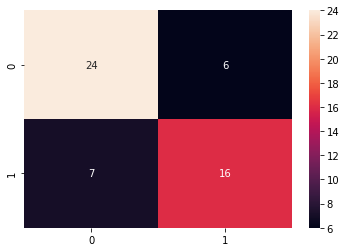

In [53]:
CM=confusion_matrix(y_test,y_pred_rfe)
sns.heatmap(CM, annot=True)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
loss_log = log_loss(y_test, y_pred_rfe)
acc= accuracy_score(y_test, y_pred_rfe)
roc=roc_auc_score(y_test, y_pred_rfe)
prec = precision_score(y_test, y_pred_rfe)
rec = recall_score(y_test, y_pred_rfe)
f1 = f1_score(y_test, y_pred_rfe)

mathew = matthews_corrcoef(y_test, y_pred_rfe)
model_results =pd.DataFrame([['Random Forest',acc, prec,rec,specificity, f1,roc, loss_log,mathew]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])

model_results

In [54]:
data = {        'MLP': y_pred_mlp, 
                'KNN': y_pred_knn, 
                'EXtra tree classifier': y_pred_et_100,
                'XGB': y_pred_xgb, 
                'SVC': y_pred_svc, 
                'SGD': y_pred_sgd,
                'Adaboost': y_pred_ada, 
                'CART': y_pred_decc, 
                'GBM': y_pred_gbm }

models = pd.DataFrame(data) 
 
for column in models:
    CM=confusion_matrix(y_test,models[column])
    
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    specificity = TN/(TN+FP)
    loss_log = log_loss(y_test, models[column])
    acc= accuracy_score(y_test, models[column])
    roc=roc_auc_score(y_test, models[column])
    prec = precision_score(y_test, models[column])
    rec = recall_score(y_test, models[column])
    f1 = f1_score(y_test, models[column])
    
    mathew = matthews_corrcoef(y_test, models[column])
    results =pd.DataFrame([[column,acc, prec,rec,specificity, f1,roc, loss_log,mathew]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])
    model_results = model_results.append(results, ignore_index = True)

model_results


,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef
0,Random Forest,0.754717,0.727273,0.695652,0.800000,0.711111,0.747826,8.471866,0.498551
1,MLP,0.792453,0.772727,0.739130,0.833333,0.755556,0.786232,7.168501,0.575812
2,KNN,0.792453,0.772727,0.739130,0.833333,0.755556,0.786232,7.168501,0.575812
3,EXtra tree classifier,0.773585,0.761905,0.695652,0.833333,0.727273,0.764493,7.820176,0.536023
4,XGB,0.811321,0.782609,0.782609,0.833333,0.782609,0.807971,6.516826,0.615942
5,SVC,0.811321,0.809524,0.739130,0.866667,0.772727,0.802899,6.516811,0.613857
6,SGD,0.433962,0.433962,1.000000,0.000000,0.605263,0.500000,19.550703,0.000000
7,Adaboost,0.735849,0.695652,0.695652,0.766667,0.695652,0.731159,9.123556,0.462319
8,CART,0.792453,0.750000,0.782609,0.800000,0.765957,0.791304,7.168516,0.580092
9,GBM,0.773585,0.720000,0.782609,0.766667,0.750000,0.774638,7.820206,0.545338


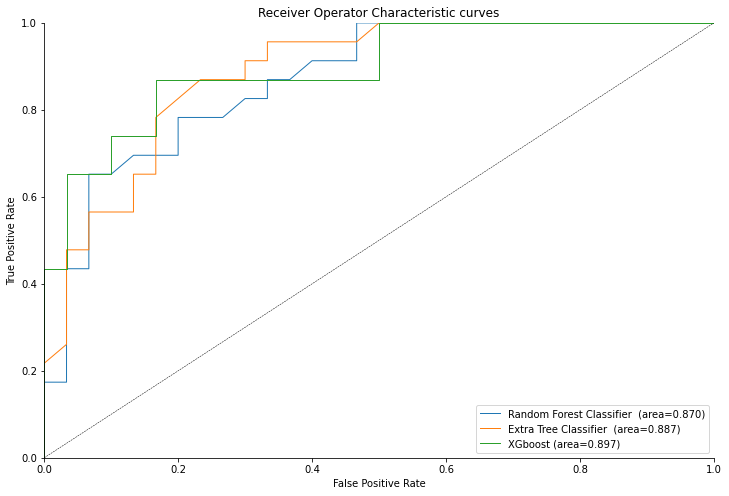

In [55]:
def roc_auc_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    from sklearn.metrics import roc_curve, roc_auc_score
    fpr, tpr, _ = roc_curve(y_true, y_proba[:,1])
    ax.plot(fpr, tpr, linestyle=l, linewidth=lw,
            label="%s (area=%.3f)"%(label,roc_auc_score(y_true, y_proba[:,1])))

f, ax = plt.subplots(figsize=(12,8))


roc_auc_plot(y_test,rf_ent.predict_proba(X_test),label='Random Forest Classifier ',l='-')
roc_auc_plot(y_test,et_100.predict_proba(X_test),label='Extra Tree Classifier ',l='-')
roc_auc_plot(y_test,xgb.predict_proba(X_test),label='XGboost',l='-')

ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--', 
        )    
ax.legend(loc="lower right")    
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic curves')
sns.despine()

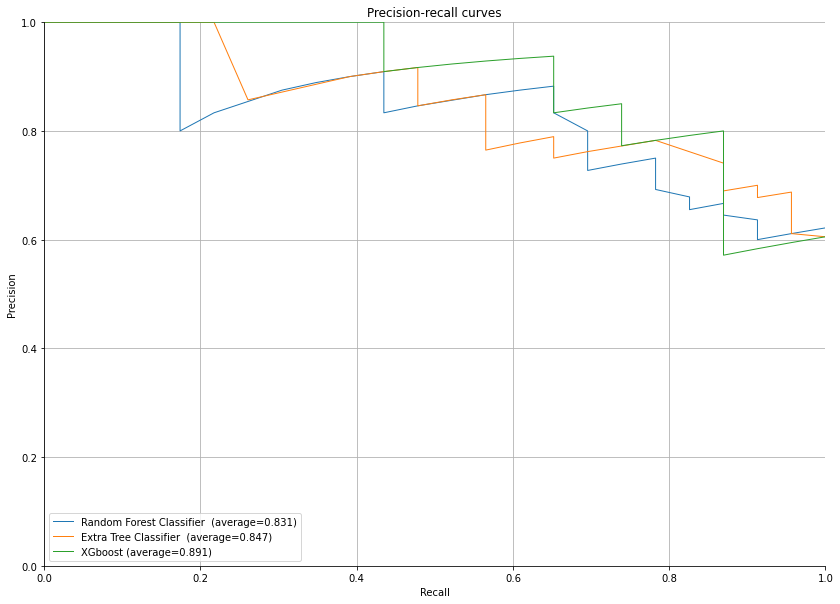

In [56]:
def precision_recall_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    from sklearn.metrics import precision_recall_curve, average_precision_score
    precision, recall, _ = precision_recall_curve(y_test,
                                                  y_proba[:,1])
    average_precision = average_precision_score(y_test, y_proba[:,1],
                                                     average="micro")
    ax.plot(recall, precision, label='%s (average=%.3f)'%(label,average_precision),
            linestyle=l, linewidth=lw)

f, ax = plt.subplots(figsize=(14,10))

precision_recall_plot(y_test,rf_ent.predict_proba(X_test),label='Random Forest Classifier ',l='-')
precision_recall_plot(y_test,et_100.predict_proba(X_test),label='Extra Tree Classifier ',l='-')
precision_recall_plot(y_test,xgb.predict_proba(X_test),label='XGboost',l='-')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc="lower left")
ax.grid(True)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Precision-recall curves')
sns.despine()

<AxesSubplot:>

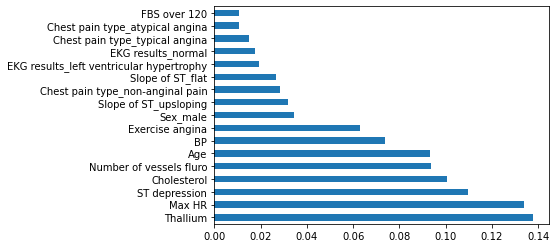

In [61]:
feat_importances = pd.Series(rf_ent.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')

In [67]:
Y={0.584906,0.320896,0.458955,1.14521}
if(Y==1):
    print("The Person having a data diseases")
else:
    print("The person not having a heart diseases")

The person not having a heart diseases


From above model we can predict accuracy of 85% by using a logistic regression algorthim.
Compare to all the algorithm logistic regression is best to predict the heart diseases with high accuracy